In [23]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap

In [2]:
file_path = 'C:/Users/andre/OneDrive/Documentos/GitHub/DataMining_G31/Data/DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
import sys
import os

# Add parent directory (one level up) to the path
sys.path.append(os.path.abspath(os.path.join('..')))

# Now you should be able to import from the Functions folder
from Functions.CleanUp import cleanUp

In [4]:
# Now you can call the function
df, columns_dict = cleanUp(df)

-----------looking for incostisencies -----------
There are repeated values in the dataset
      customer_id customer_region  customer_age  vendor_count  product_count  \
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
20855         0         35.0          35          -           CARD   
20907         0         35.0          35          -           CARD   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
20855           0.0        0.0            0.0       0.0                 0.0   
20907           0.0        0.0            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
20855          0.0           0.0          0.0         0.0          0.0   
20907          0.0           0.0          0.0         0.0          0.0 

In [5]:
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,used_promo,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,True,2.0,28.88,2.500000,14.440,5.776
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,True,2.0,19.21,1.000000,9.605,9.605
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,True,2.0,9.20,1.000000,4.600,4.600
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,True,3.0,31.56,1.000000,10.520,10.520
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,No_Promo,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,3.0,55.44,1.666667,18.480,11.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,True,NaN,18.04,NaN,NaN,18.040
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,True,NaN,18.04,NaN,NaN,18.040
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,No_Promo,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,NaN,17.79,NaN,NaN,17.790
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,True,NaN,12.03,NaN,NaN,12.030


# Days of the Week Analysis


# 3. Descriptive Statistics for DOW Feature
##### Objective: Summarize the key characteristics of the DOW feature.

In [6]:
dow_columns = [col for col in df.columns if col.startswith('DOW')]
df[dow_columns].isna().sum()
# None of the DOW columns have NaN values

DOW_0    0
DOW_1    0
DOW_2    0
DOW_3    0
DOW_4    0
DOW_5    0
DOW_6    0
dtype: int64

In [7]:
df[dow_columns].isna().sum()

DOW_0    0
DOW_1    0
DOW_2    0
DOW_3    0
DOW_4    0
DOW_5    0
DOW_6    0
dtype: int64

In [8]:
df[dow_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
DOW_0,31888.0,0.555914,1.013601,0.0,0.0,0.0,1.0,16.0
DOW_1,31888.0,0.567486,1.044090,0.0,0.0,0.0,1.0,17.0
DOW_2,31888.0,0.591006,1.045907,0.0,0.0,0.0,1.0,15.0
DOW_3,31888.0,0.619449,1.069672,0.0,0.0,0.0,1.0,17.0
DOW_4,31888.0,0.677747,1.088122,0.0,0.0,0.0,1.0,16.0
DOW_5,31888.0,0.652973,1.069947,0.0,0.0,0.0,1.0,20.0
DOW_6,31888.0,0.704246,1.167446,0.0,0.0,0.0,1.0,20.0


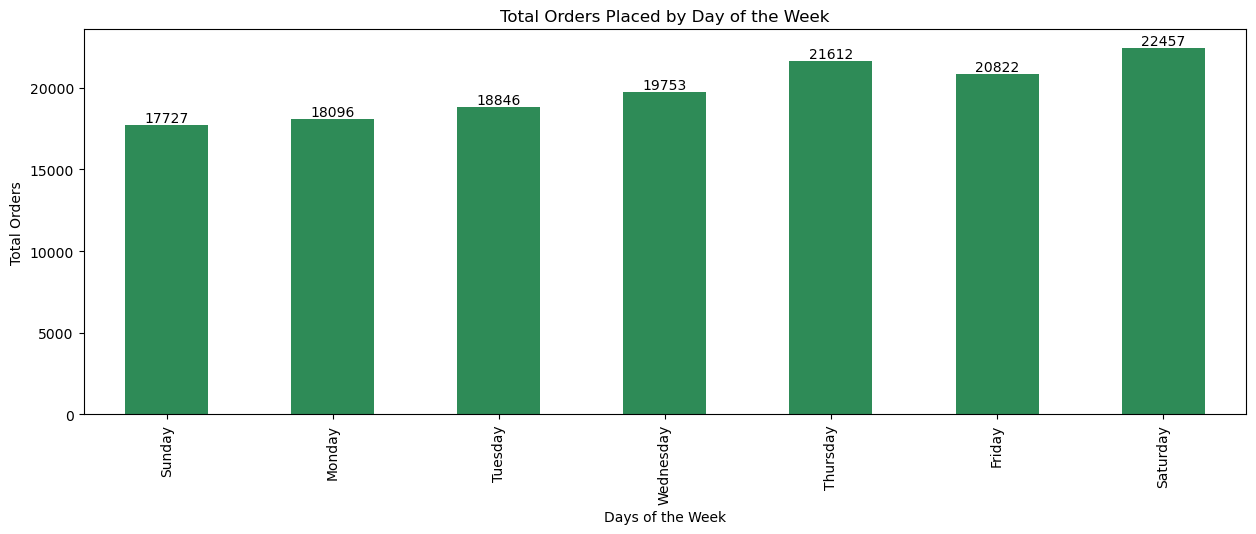

In [30]:
#'days' variable
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


df[dow_columns].sum().plot(kind='bar', color='seagreen')
plt.title('Total Orders Placed by Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Total Orders')
for index, value in enumerate(df[dow_columns].sum()):
    plt.text(index, value, str(value), ha='center', va='bottom')
#df[dow_columns].sum().plot(kind='line', color='peru', marker='o')
plt.xticks(ticks=np.arange(len(days)), labels=days)
plt.gcf().set_size_inches(15, 5)  # Set the figure size to be larger horizontally
plt.show()



Through the analysis of the graph, we can verify that the days of the week are a factor that influences the customers' ordering behavior.

As the weekend approaches, customers place a higher number of orders, reaching the peak on thursdays and Saturdays. On Sundays, the number of orders drops significantly.

   Category  Total Orders  Mean Orders
0  Weekdays         99129      19825.8
1  Weekends         40184      20092.0


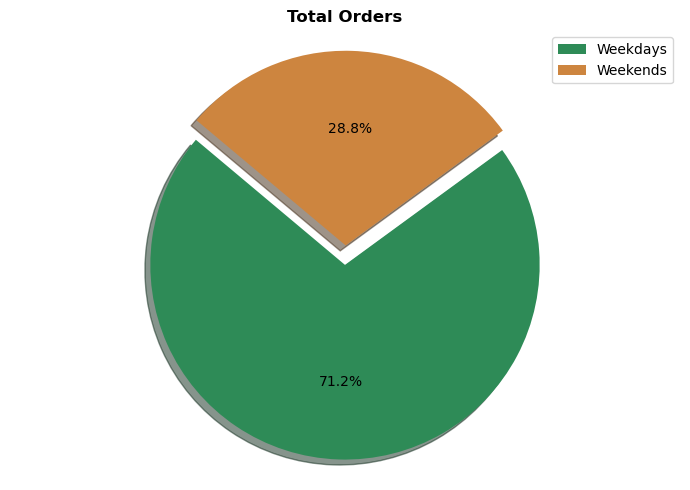

In [19]:
# Define the columns for weekdays and weekends
weekday_columns = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']
weekend_columns = ['DOW_0', 'DOW_6']

# Calculate the total orders for weekdays and weekends
weekday_orders = df[weekday_columns].sum().sum() 
weekend_orders = df[weekend_columns].sum().sum() 

# Calculate the mean of orders for weekdays and weekends
weekday_orders_mean = df[weekday_columns].sum().sum() / 5
weekend_orders_mean = df[weekend_columns].sum().sum() / 2

# Data for the pie chart
labels = ['Weekdays', 'Weekends']
sizes = [weekday_orders, weekend_orders]
colors = ['seagreen','peru']
explode = (0.1, 0)  # explode the 1st slice (i.e. 'Weekdays')

# Create a DataFrame to hold the orders and their percentages, to better display the data
orders_data = {
    'Category': ['Weekdays', 'Weekends'],
    'Total Orders': [weekday_orders, weekend_orders],
    'Mean Orders': [weekday_orders_mean, weekend_orders_mean]
}

DOW_orders_df = pd.DataFrame(orders_data)
print(DOW_orders_df)

plt.figure(figsize=(7, 5))

# Total Orders pie chart
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Orders', fontweight='bold')
plt.legend(labels, loc="upper right")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Show the chart
plt.tight_layout()  # Adjust layout if necessary
plt.show()

We can see that in terms of absolute values, there are more orders placed in the weekdays that in the weekends. But that´s because the weekdays have more days. If we look to the mean of orders we notice that the value its almost the same. We can also see the variability of the orders by locking at the standard deviation

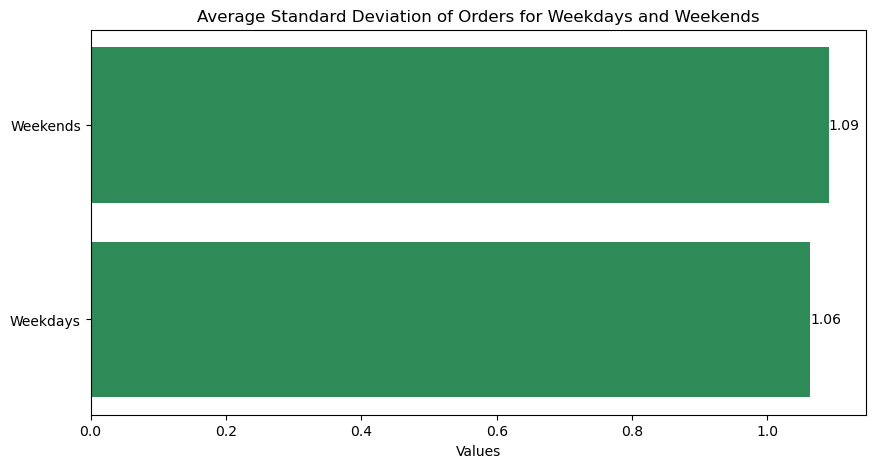

In [20]:
# Calculate average standard deviations for weekdays and weekends
values = [df[weekday_columns].std().mean(), df[weekend_columns].std().mean()]
categories = ['Weekdays', 'Weekends']

# Create horizontal bar chart
plt.figure(figsize=(10, 5))
bars = plt.barh(categories, values, color='seagreen')

# Add values to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')

# Add labels and title
plt.xlabel('Values')
plt.title('Average Standard Deviation of Orders for Weekdays and Weekends')

# Show the plot
plt.show()

We can see that the variability of orders placed in the weekdays is almost the same in the weekends, with the last one being a litlle higher

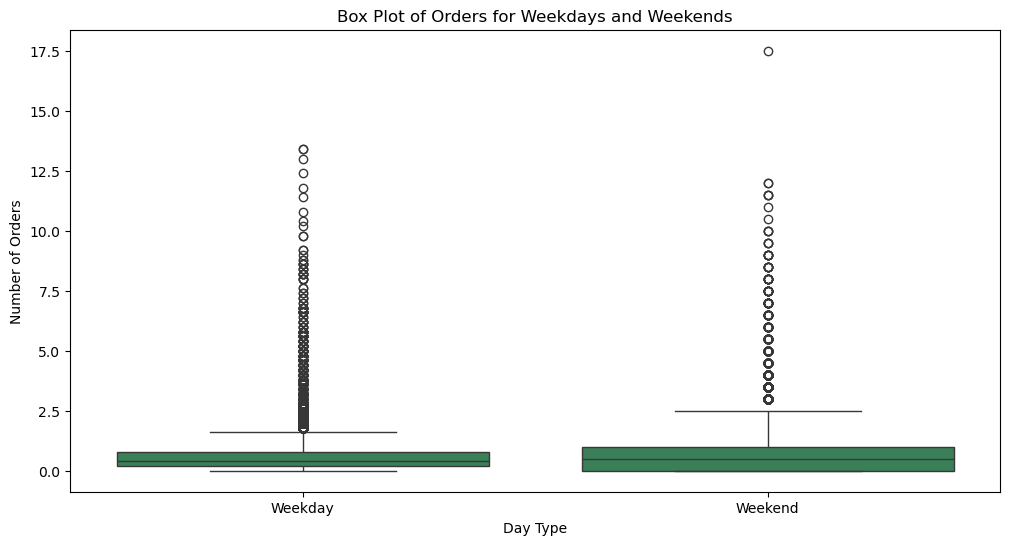

In [21]:
# Separate weekday and weekend data and calculate the mean orders for each
weekday_data = df[weekday_columns].assign(Day_Type='Weekday', Orders=df[weekday_columns].mean(axis=1))
weekend_data = df[weekend_columns].assign(Day_Type='Weekend', Orders=df[weekend_columns].mean(axis=1))

# Combine the weekday and weekend data into a single DataFrame
combined_data = pd.concat([weekday_data[['Day_Type', 'Orders']], weekend_data[['Day_Type', 'Orders']]])

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_Type', y='Orders', data=combined_data, color = 'seagreen')
plt.title('Box Plot of Orders for Weekdays and Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Orders')
plt.show()

As we can see by the images, 75% of the clients placed less than 1 order for all the days

# 4. Days of the Week vs. Regions
##### Objective: Explore regional differences in ordering behavior by day.

In [13]:
heatmap_data = df.groupby('customer_region')[dow_columns].sum()
heatmap_data

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
customer_region,,,,,,,
2360,5839,6018,6267,6422,6900,6803,7542
2440,964,990,984,1029,1048,1100,1225
2490,282,265,226,276,296,330,348
4140,298,305,356,363,511,412,498
4660,5137,5356,5738,6400,7627,6617,7060
8370,176,194,182,163,186,195,196
8550,14,10,20,20,10,18,8
8670,4799,4760,4875,4860,4829,5122,5347


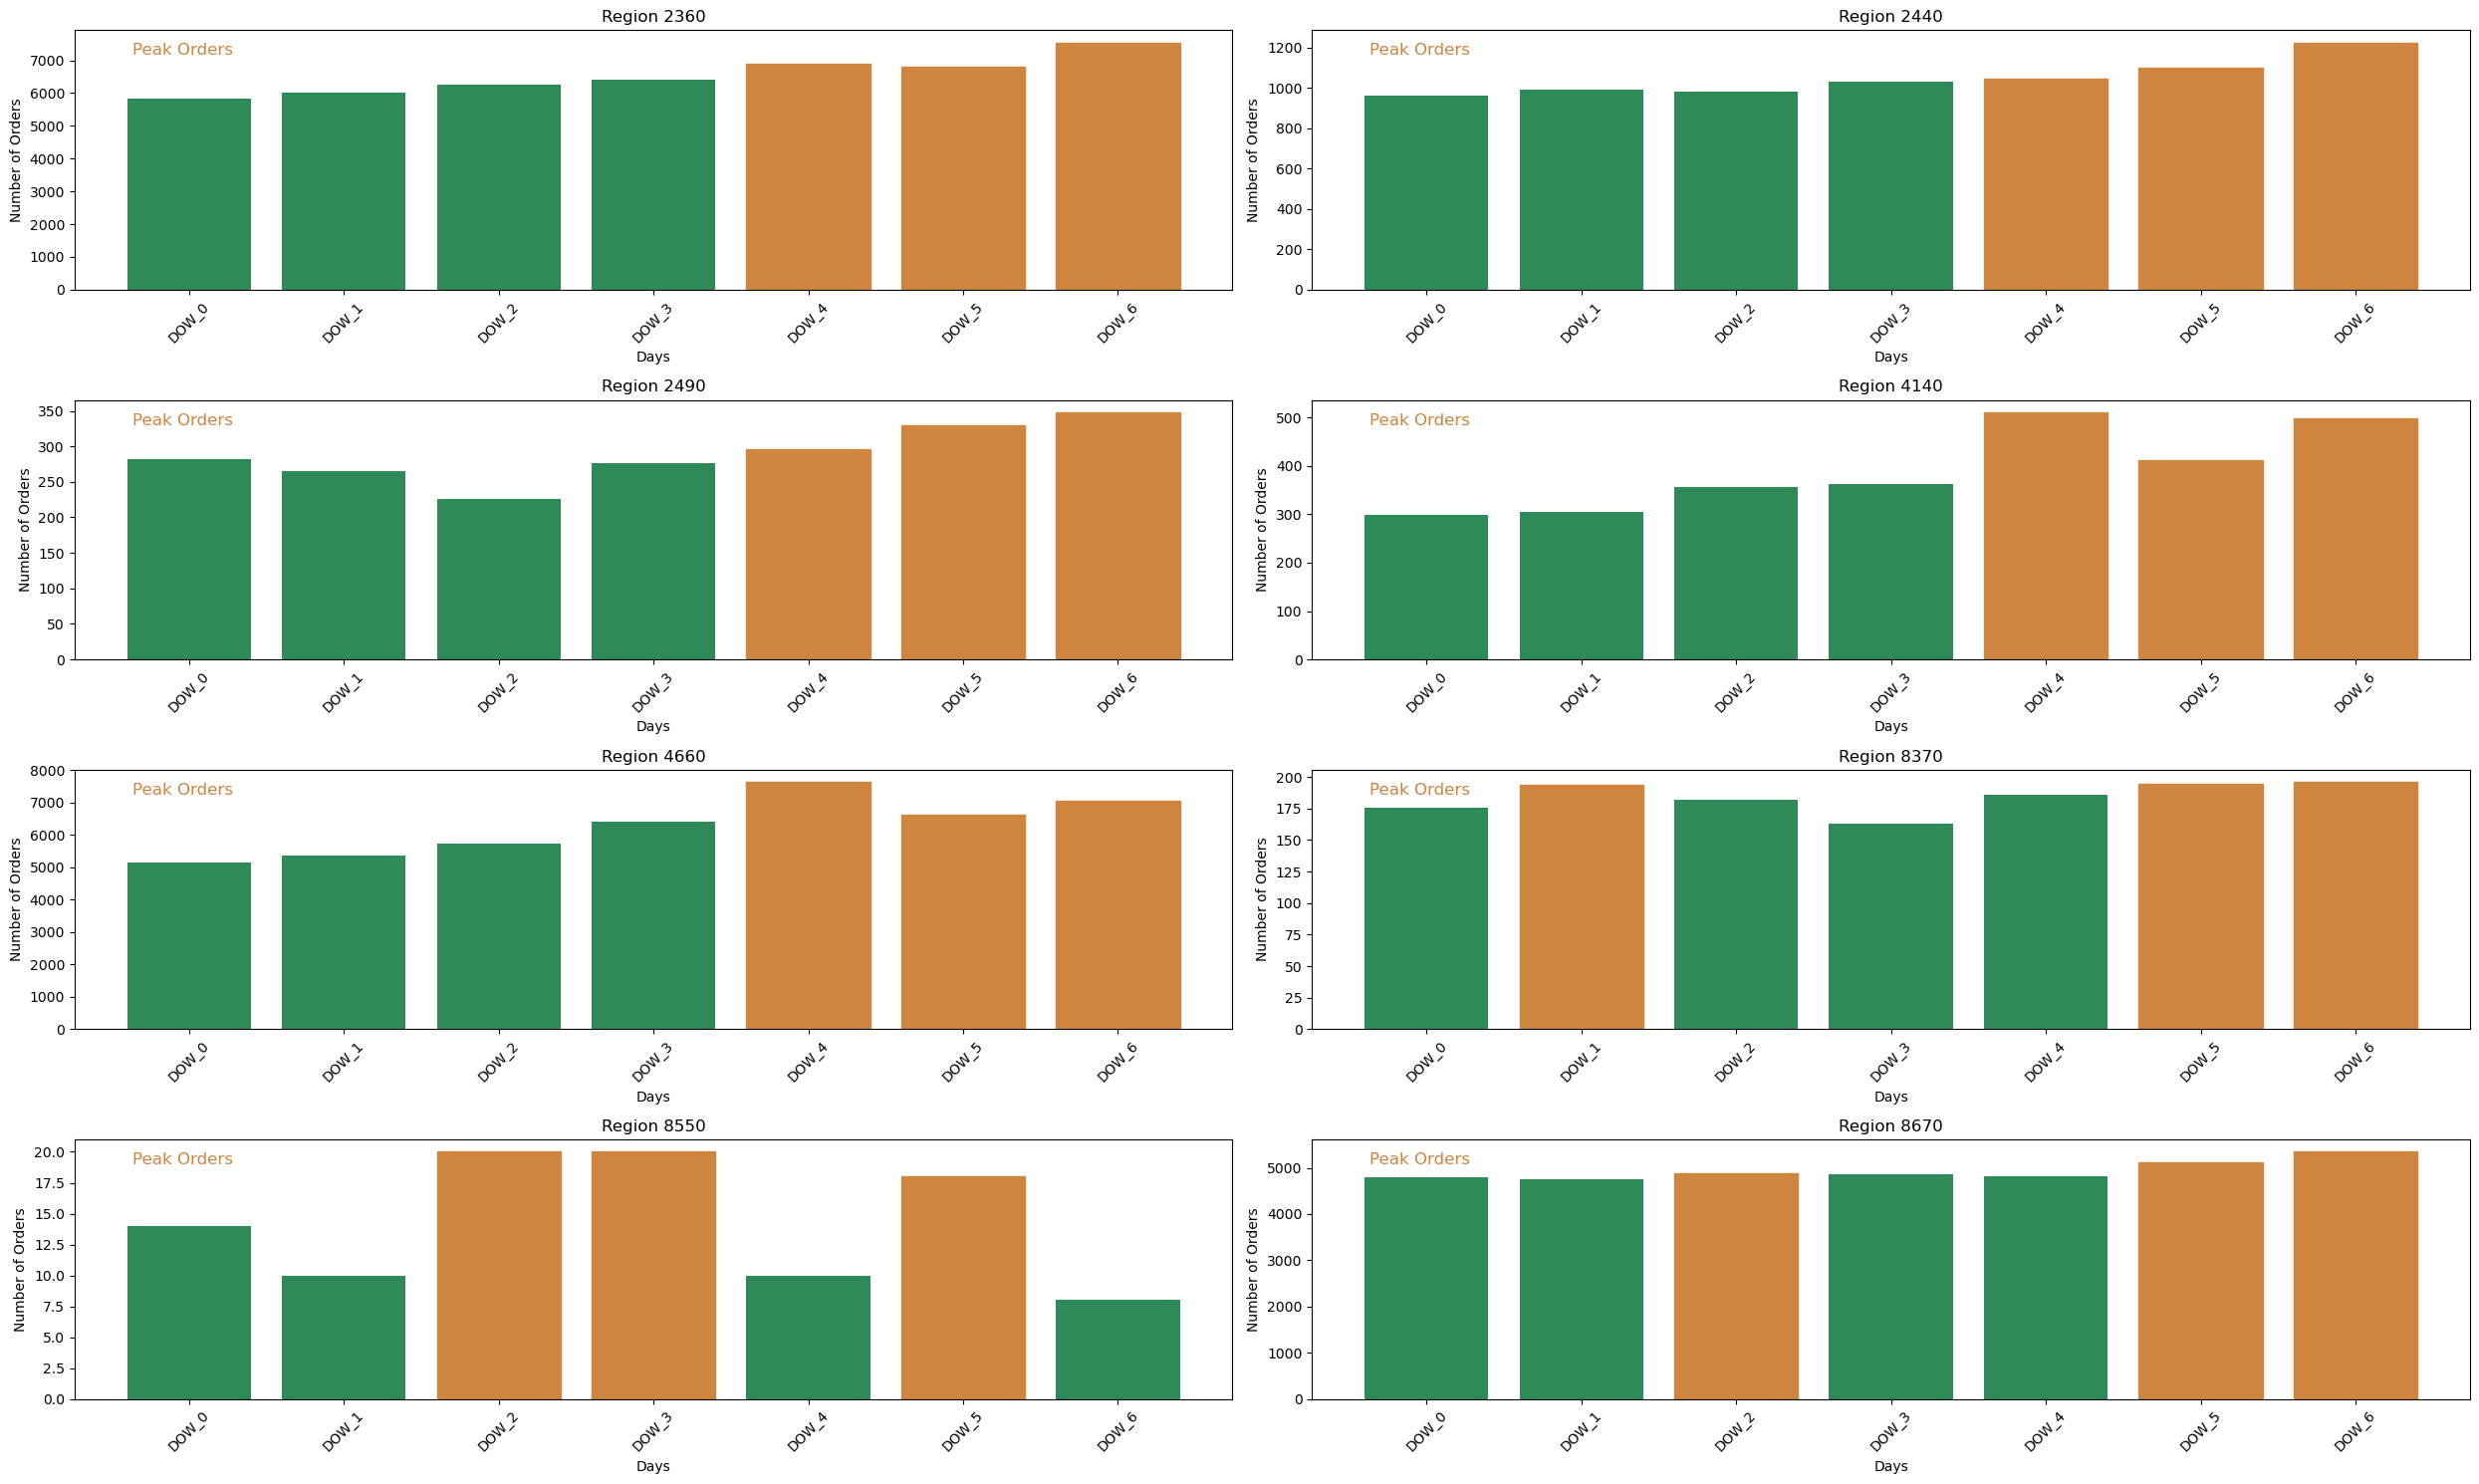

In [22]:
# Group by region and sum orders by day of the week
region_dow_sum = df.groupby('customer_region')[dow_columns].sum()

# Define the number of regions and subplots
num_regions = len(region_dow_sum)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 15))  # Increase size to 25x15

# Flatten axes for iteration
axes = axes.flatten()  

# Plot histograms for each region in its respective subplot
for idx, (region, data) in enumerate(region_dow_sum.iterrows()):
    # Sort days by order count and select the top 3
    top_3_days = data.sort_values(ascending=False).head(3)
    
    # Plot all bars in medium aquamarine
    bars = axes[idx].bar(region_dow_sum.columns, data.values, color='seagreen')
    
    # Highlight the top 3 days in peru color
    for bar, day in zip(bars, region_dow_sum.columns):
        if day in top_3_days.index:
            bar.set_color('peru')
    
    # Set titles and labels in English
    axes[idx].set_title(f'Region {region}')
    axes[idx].set_xlabel('Days')
    axes[idx].set_ylabel('Number of Orders')
    
    # Add label in the top corner saying "Peak Orders" in red
    axes[idx].text(0.05, 0.95, 'Peak Orders', color='peru', fontsize=12, ha='left', va='top', transform=axes[idx].transAxes)

    # Rotate x-axis values for readability
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

with this vizualization its hard to see the behaviou by region

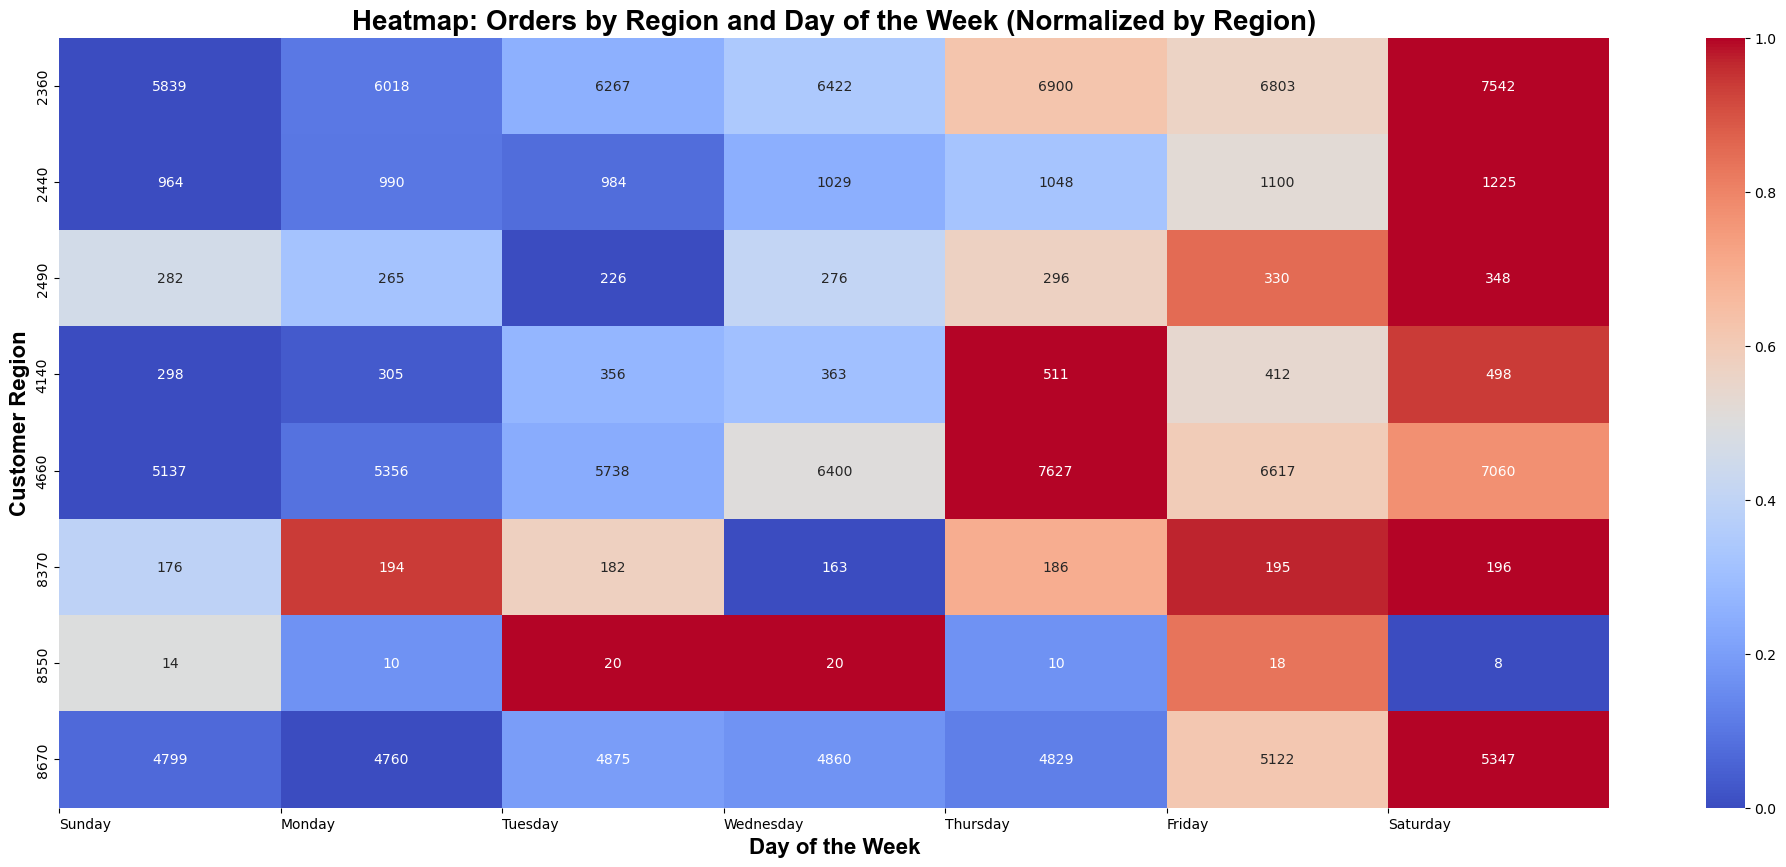

In [25]:
# Creating a frequency table
heatmap_data = df.groupby('customer_region')[dow_columns].sum().T

# Normalizing the values of each column (age) individually
scaler = MinMaxScaler()
heatmap_data_normalized = pd.DataFrame(scaler.fit_transform(heatmap_data))


# Creating the heatmap with normalized data, but using the real values for annotations
plt.figure(figsize=(25, 10))
#Trasnposing the data to make it more readable
sns.heatmap(heatmap_data_normalized.T, cmap="coolwarm", annot=heatmap_data.T, fmt='g', annot_kws={"size": 10, "ha": 'center', "va": 'center'})
# Set the title and axis labels
plt.title('Heatmap: Orders by Region and Day of the Week (Normalized by Region)', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.xlabel('Day of the Week', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.ylabel('Customer Region', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

# Set the x-axis labels to the names of the week
plt.xticks(ticks=np.arange(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ha = 'left')
# Set the y-axis labels to the names of the regions, and define the cordenates
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5,6.5,7.5], heatmap_data.T.index)



plt.show()


As we can observe from the plot analysis, almost all regions place a higher number of orders towards the end of the week, particularly on Thursday, Friday, and Saturday, with a drop during the week that begins on Sunday, similar to the overall distribution previously seen.

Only regions 8550 and 8370 are exceptions. Region 8550 has very few data points, so its analysis must be approached with this in mind. Keeping this in mind, we can see that this region has a peak of orders during the week, specifically on Tuesday and Wednesday.

On the other hand, region 8370, like all the others, shows a strong concentration of orders placed on Thursday, Friday, and Saturday, but also has an equally large peak of orders placed on Mondays and Tuesday.

#### We can also make this analysis, by mean orders placed in the weekdays and in the weekends

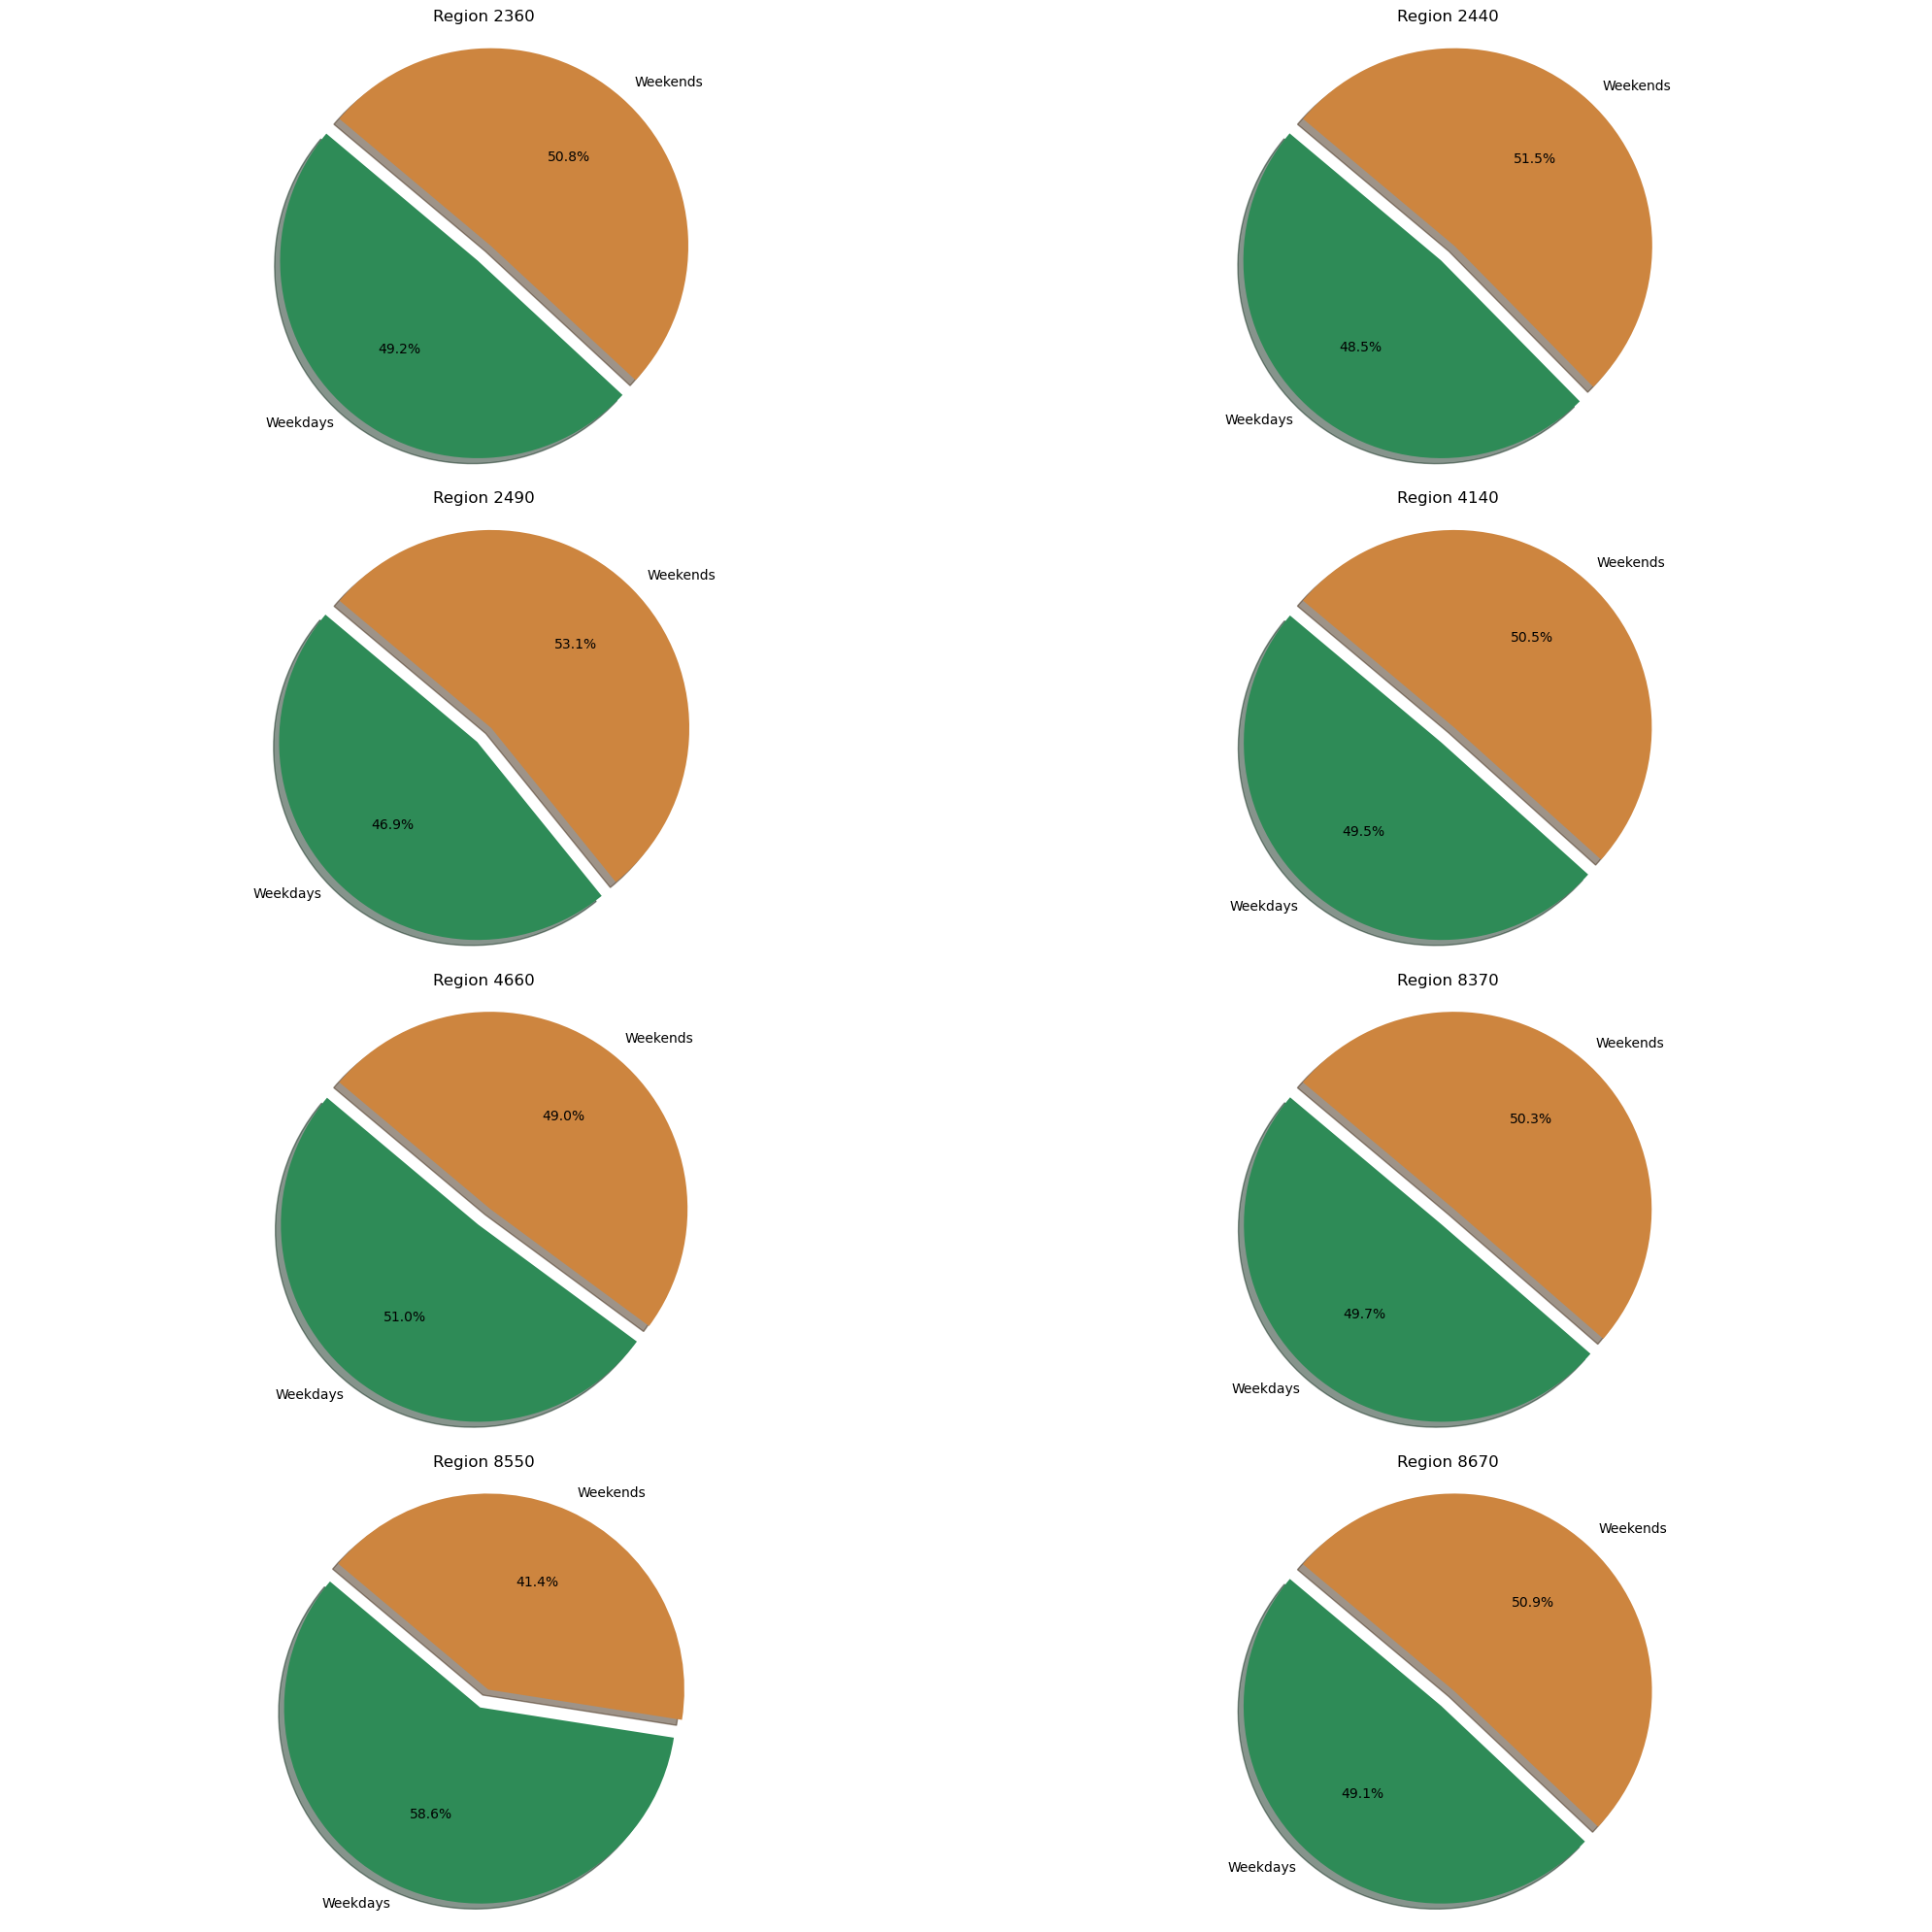

In [26]:
# Calculate the mean orders for weekdays and weekends for each region
region_dow_mean = df.groupby('customer_region')[dow_columns].sum()
region_dow_mean['Weekdays_Mean'] = region_dow_mean[weekday_columns].mean(axis=1)  
region_dow_mean['Weekends_Mean'] = region_dow_mean[weekend_columns].mean(axis=1)  

# Plot pie charts for each region
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Iterate over each region and create a pie chart
for ax, (region, data) in zip(axes.flatten(), region_dow_mean.iterrows()):
    sizes = [data['Weekdays_Mean'], data['Weekends_Mean']]
    labels = ['Weekdays', 'Weekends']
    colors = ['seagreen', 'peru']
    
    ax.pie(sizes, explode=(0.1, 0), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.set_title(f'Region {region}')
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Adjust layout
plt.tight_layout()
plt.show()

We can see almost all of the regions have the same average of orders placed on the weekends and on the weekdays.

The exceptions are:

    Region 2490 ==> has in average a litlle bit more orders place on the weekends, compared to the other regions.
    
    Region 8550 ==> Has in average more orders placed during the weekdays (this regions has litlle data)

# 5. Days of the Week vs. Customer Age
##### Objective: Understand how age groups behave in relation to ordering times.

In [17]:
pd.set_option('display.max_rows', None)
age_dow_sum = df.groupby('customer_age')[dow_columns].sum()
age_dow_sum

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
customer_age,,,,,,,
15.0,17,19,10,8,18,9,7
16.0,50,47,40,55,56,70,56
17.0,135,138,145,149,182,151,185
18.0,320,305,312,351,377,383,429
19.0,557,591,594,629,644,647,713
20.0,764,777,843,893,986,887,947
21.0,1041,1045,1100,1149,1348,1266,1406
22.0,1185,1304,1374,1398,1581,1470,1632
23.0,1380,1442,1421,1496,1701,1673,1717


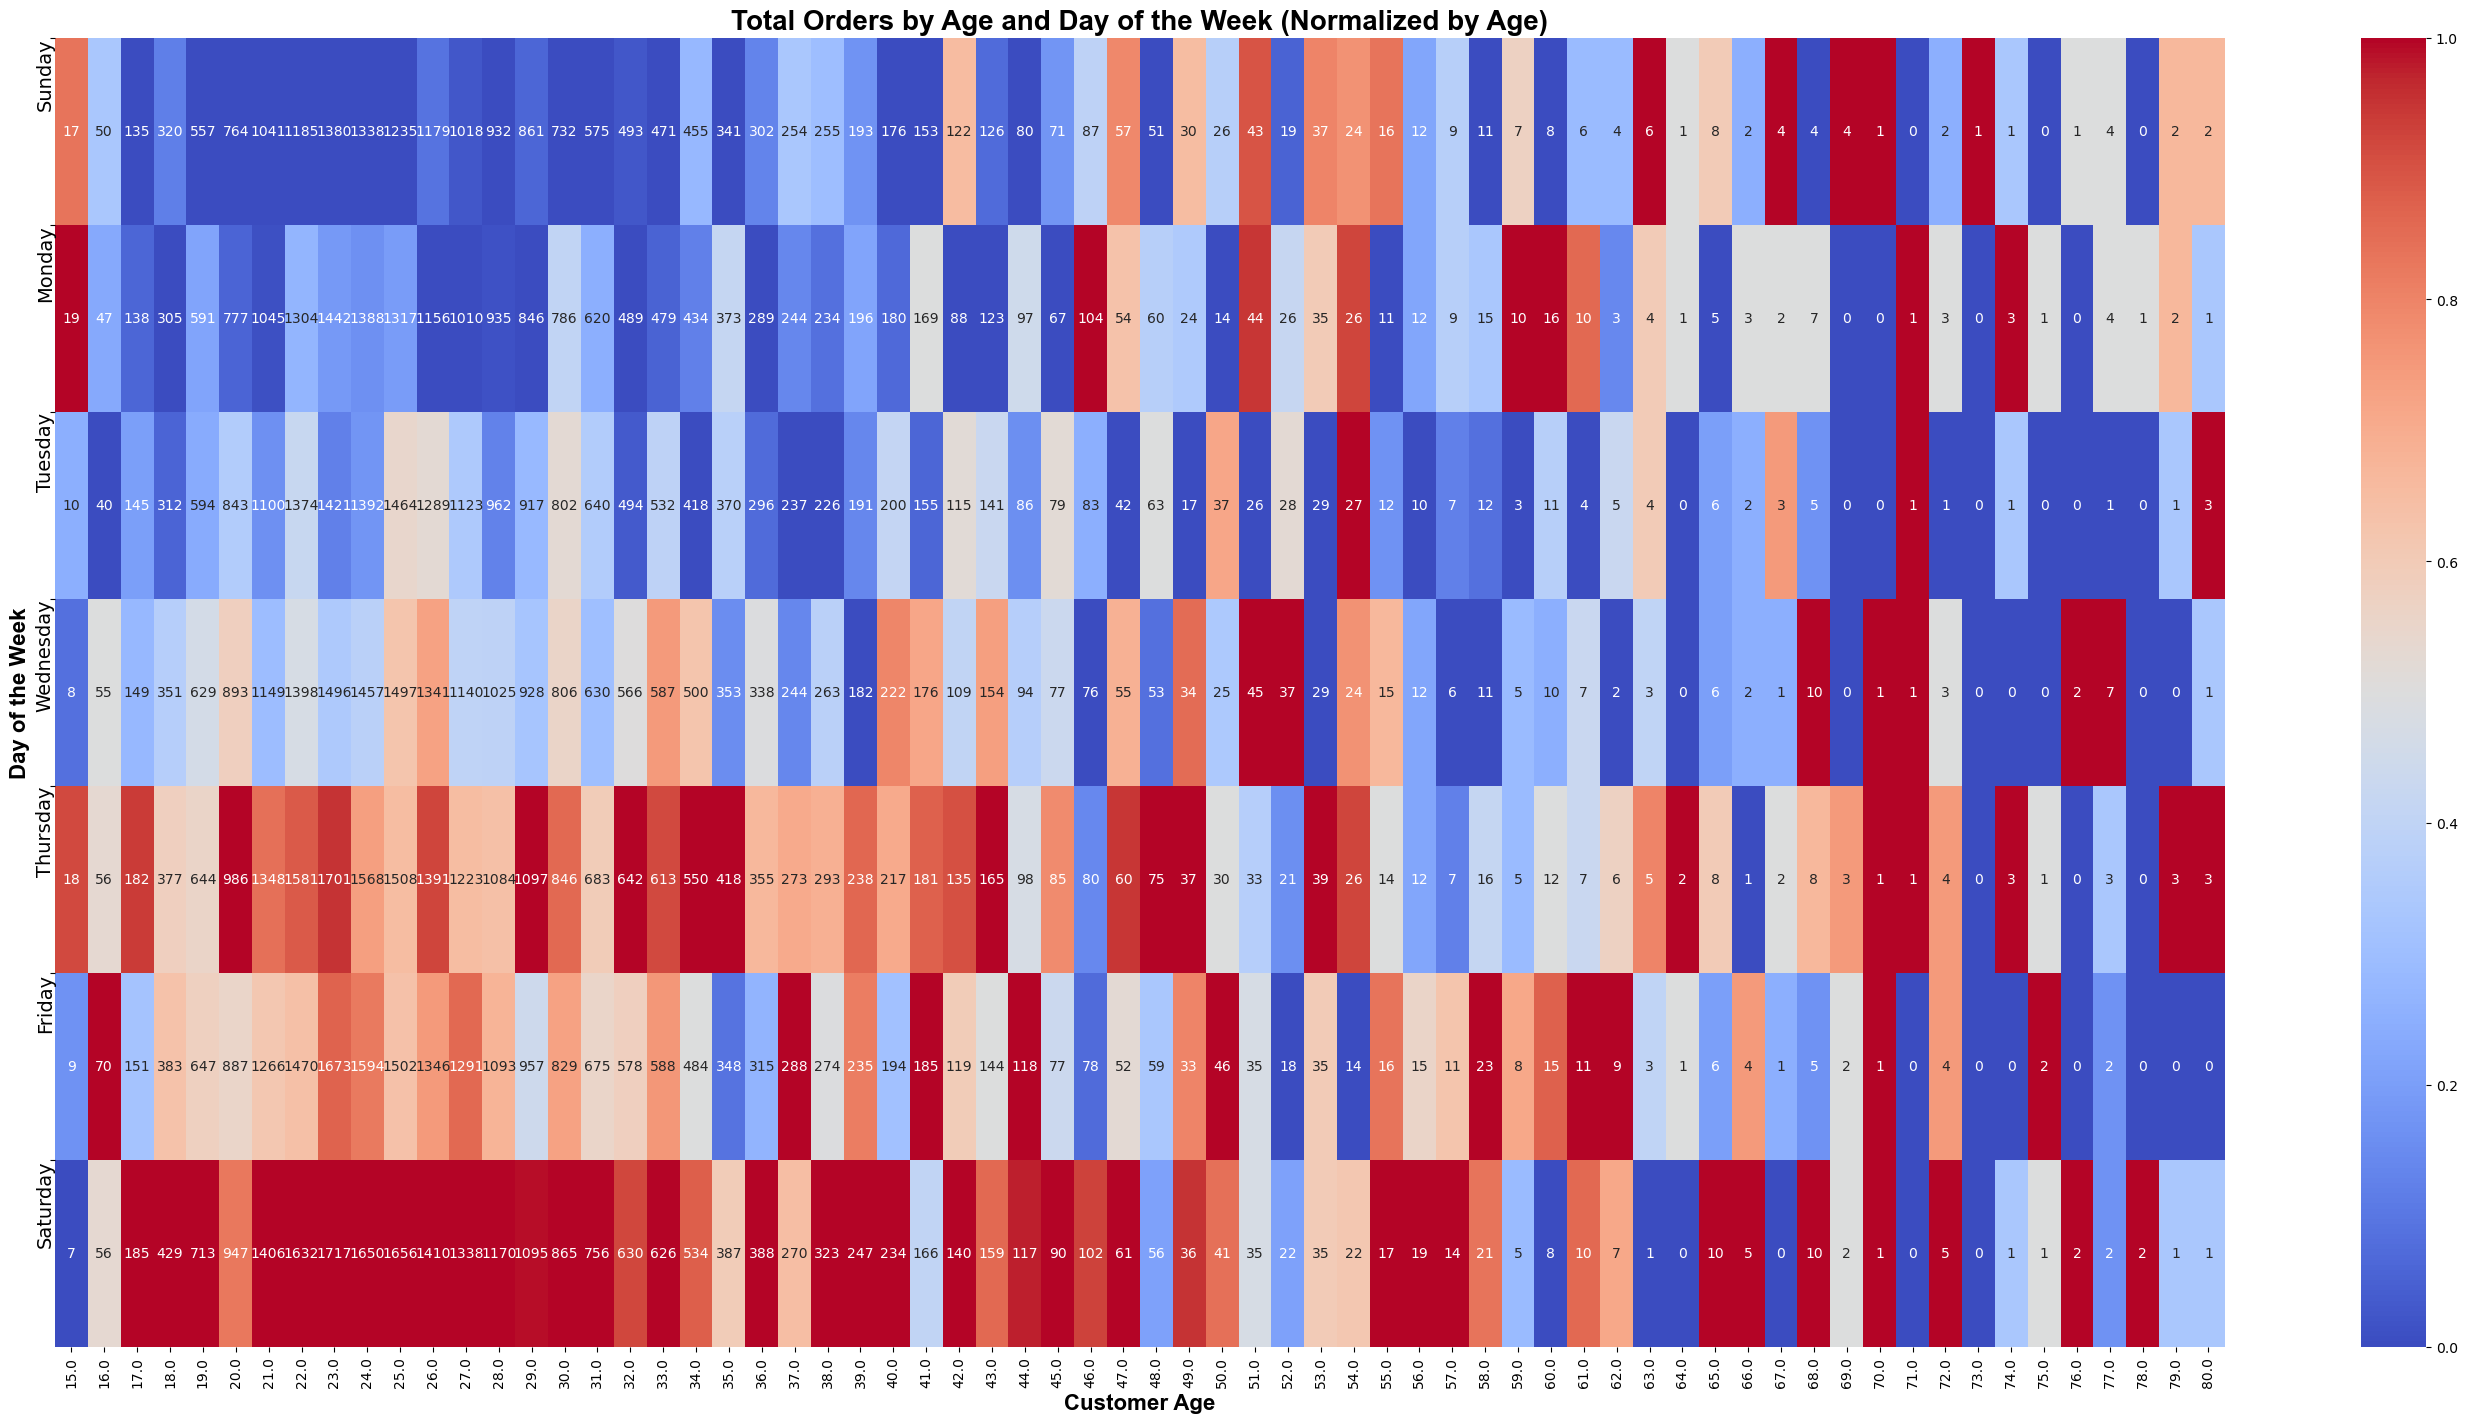

In [27]:
heatmap_data = df.groupby('customer_age')[dow_columns].sum().T

# Create a scaler instance for Min-Max normalization
scaler = MinMaxScaler()
# Normalize the 'data' dataframe (column-wise normalization)
heatmap_data_normalized = pd.DataFrame(scaler.fit_transform(heatmap_data), columns=heatmap_data.columns, index=heatmap_data.index)

# Creating the heatmap with normalized data, but using the real values for annotations
plt.figure(figsize=(35, 17))
# Create the heatmap
ax = sns.heatmap(heatmap_data_normalized, cmap='coolwarm', annot=heatmap_data, fmt='g', annot_kws={"size": 10, "ha": 'center', "va": 'center'})

# Set the title and axis labels
plt.title('Total Orders by Age and Day of the Week (Normalized by Age)', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.xlabel('Customer Age', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.ylabel('Day of the Week', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

# Set custom y-tick positions (if necessary) and labels
plt.yticks(ticks=np.arange(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ha = 'center')
plt.tick_params(axis='y', labelsize=14)  # Set the font size of the y-ticks

plt.xticks(rotation=90)  # Rotate the x-ticks to be vertical

# adjust the position of the y-ticks on the heatmap
for tick in ax.get_yticklabels():
    tick.set_verticalalignment('top')  

plt.show()

We can see that the order placement behavior across different days changes with the customer's age. Customers between the ages of 16 and 40 tend to focus their orders between Thursday and Saturday, with a particular emphasis on Saturdays. Starting from the age of 40, customers also begin to focus their orders on Sunday and Monday. The exception to this pattern appears to be customers aged 15, who also show a strong tendency to place orders on Sunday and Monday.